In [2]:
from traitlets.config.manager import BaseJSONConfigManager
path = 'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Anaconda3_64\\etc\\jupyter\\nbconfig'
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {
              "theme": "solarized",
              "transition": "linear",
              "start_slideshow_at": "selected",
})

{'start_slideshow_at': 'selected',
 'theme': 'solarized',
 'transition': 'linear'}

# Intro!

Hello world $$x=\sum_{j=1}^{n}\frac{j ^2}{n}$$

|as| asda            | adad |
|--|-----------------|------|
|sj| 13              | x    |
|am| 12              | y    |

In [3]:
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
#read data from csv
train_data = pd.read_csv("iris_training.csv", names=['f1', 'f2', 'f3', 'f4', 'f5'])
test_data = pd.read_csv("iris_test.csv", names=['f1', 'f2', 'f3', 'f4', 'f5'])

In [5]:
#encode results to onehot
train_data['f5'] = train_data['f5'].map({0: [1, 0, 0], 1: [0, 1, 0], 2: [0, 0, 1]})
test_data['f5'] = test_data['f5'].map({0: [1, 0, 0], 1: [0, 1, 0], 2: [0, 0, 1]})

#separate train data
train_x = train_data[['f1', 'f2', 'f3', 'f4']]
train_y = train_data.ix[:, 'f5']

#separate test data
test_x = test_data[['f1', 'f2', 'f3', 'f4']]
test_y = test_data.ix[:, 'f5']

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


In [6]:
train_data.head()

,f1,f2,f3,f4,f5
0,6.4,2.8,5.6,2.2,"[0, 0, 1]"
1,5.0,2.3,3.3,1.0,"[0, 1, 0]"
2,4.9,2.5,4.5,1.7,"[0, 0, 1]"
3,4.9,3.1,1.5,0.1,"[1, 0, 0]"
4,5.7,3.8,1.7,0.3,"[1, 0, 0]"


In [7]:
#placeholders for inputs and outputs
X = tf.placeholder(tf.float32, [None, 4])
Y = tf.placeholder(tf.float32, [None, 3])

#weight and bias
weight = tf.Variable(tf.zeros([4, 3]))
bias = tf.Variable(tf.zeros([3]))

#output after going activation function
output = tf.nn.softmax(tf.matmul(X, weight) + bias)
#cost funciton
cost = tf.reduce_mean(tf.square(Y-output))
#train model
train = tf.train.AdamOptimizer(0.01).minimize(cost)

#check sucess and failures
success = tf.equal(tf.argmax(output, 1), tf.argmax(Y, 1))
#calculate accuracy
accuracy = tf.reduce_mean(tf.cast(success, tf.float32))*100

#initialize variables
init = tf.global_variables_initializer()

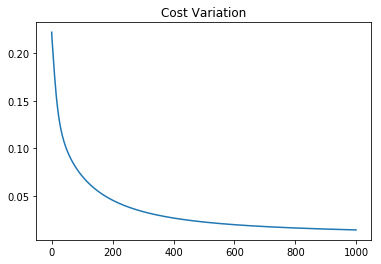

Accuracy: 96.67
[array([[ 0.04176549,  0.87734795,  0.08088659]], dtype=float32)]
[[0, 1, 0]]
[array([ True], dtype=bool)]
[array([[ 0.04176549,  0.87734795,  0.08088659]], dtype=float32)]


In [8]:
with tf.Session() as sess:
    costs = []
    sess.run(init)
    for i in range(1000):
        _,c = sess.run([train, cost], {X: train_x, Y: [t for t in train_y.as_matrix()]})
        costs.append(c)

    plt.plot(range(1000), costs)
    plt.title("Cost Variation")
    plt.show()
    print("Accuracy: %.2f" %accuracy.eval({X: test_x, Y: [t for t in test_y.as_matrix()]}))
    
    print(sess.run([output], {X: [test_x.iloc[0]]}))
    print([test_y.as_matrix()[0]])
    print(sess.run([success], {X: [test_x.iloc[0]], Y: [test_y.as_matrix()[0]]}))
    print(sess.run([tf.nn.softmax(tf.matmul(X, weight) + bias)], {X: [test_x.iloc[0]]}))